<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)
print(data)
# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=50)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(404, 13)
(102, 13)
(404, 1)
(102, 1)


<h4>Use scikit-learn library in the following cell</h4>

In [3]:
# Task 1-1: use linear regression in sklearn
lin_model = linear_model.LinearRegression()
lin_model.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
print("The Intercept and coefficents")
print("-----------------------------")
print('intercept {}'.format(lin_model.intercept_))

# reshape the coefficents to view correctly
coeff = lin_model.coef_.reshape(13, 1 )
print('coefficents {}'.format(coeff))

# print('train_target_predict = {}\ntrain_data = {}\ntest_target_predict= {}\ntest_data ={}'.format(train_target_predict.shape,train_data.shape,test_target_predict.shape,test_target.shape))
# Task 1-3: show errors on training dataset and testing dataset
train_target_predict = lin_model.predict(train_data)
target_rmse = (np.sqrt(mean_squared_error(train_target, train_target_predict)))
test_target_predict = lin_model.predict(test_data)
test_rmse = (np.sqrt(mean_squared_error(test_target, test_target_predict)))

print("\nThe training and target data error")
print("--------------------------------------")
print('train RMSE is {}'.format(target_rmse))
print('Test RMSE is {}'.format(test_rmse))


The Intercept and coefficents
-----------------------------
intercept [38.31611717]
coefficents [[-1.04683734e-01]
 [ 3.94173679e-02]
 [ 5.97497992e-02]
 [ 8.49189549e-01]
 [-2.11417205e+01]
 [ 4.18935210e+00]
 [ 6.15729868e-03]
 [-1.45337348e+00]
 [ 2.97609192e-01]
 [-1.36194161e-02]
 [-1.09117880e+00]
 [ 7.84352525e-03]
 [-4.77003618e-01]]

The training and target data error
--------------------------------------
train RMSE is 4.614331990503534
Test RMSE is 5.132790407109293


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [4]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    X_Transpose = X.transpose()
    return np.dot(np.dot(np.linalg.inv(np.dot(X_Transpose,X)),X_Transpose),y)

    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  # print('shaaaaaaaaaaaapes', X.shape,w.shape)
  return X.dot(w) 

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
intercept = w[0]
coefficents = w[1:]
print('intercept = {}'.format(intercept))
print('Coefficents = {}'.format(coefficents))

# Task 2-4: show errors on training dataset and testing dataset
train_data_predictFun = myPredictFun(train_data_intercept, w)
training_rmse = (np.sqrt(mean_squared_error(train_target, train_data_predictFun)))
test_data_predictFun = myPredictFun(test_data_intercept, w)
testing_rmse = (np.sqrt(mean_squared_error(test_target, test_data_predictFun)))

print("\nThe training and target data error")
print("--------------------------------------")
print('training RMSE is {}'.format(training_rmse))
print('Testing RMSE is {}'.format(testing_rmse))

intercept = [38.31611717]
Coefficents = [[-1.04683734e-01]
 [ 3.94173679e-02]
 [ 5.97497992e-02]
 [ 8.49189549e-01]
 [-2.11417205e+01]
 [ 4.18935210e+00]
 [ 6.15729868e-03]
 [-1.45337348e+00]
 [ 2.97609192e-01]
 [-1.36194161e-02]
 [-1.09117880e+00]
 [ 7.84352525e-03]
 [-4.77003618e-01]]

The training and target data error
--------------------------------------
training RMSE is 4.614331990503534
Testing RMSE is 5.132790407109145


<h4>Use numerical solution (basic gradient descent) to perform linear regression in the following cell</h4>

Intercept:  22.58519496757266
Coeffs:  [[-0.80371851]
 [ 0.65976931]
 [-0.15047483]
 [ 0.24034141]
 [-1.79541231]
 [ 3.20320759]
 [ 0.02767177]
 [-2.6536483 ]
 [ 1.24626345]
 [-0.96397207]
 [-2.1723906 ]
 [ 0.75000602]
 [-3.3717569 ]]

The training and target data error
--------------------------------------
training RMSE is 4.653936907498962
Testing RMSE is 5.131653879356629


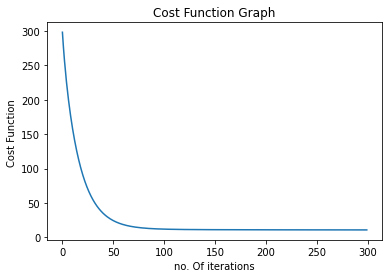

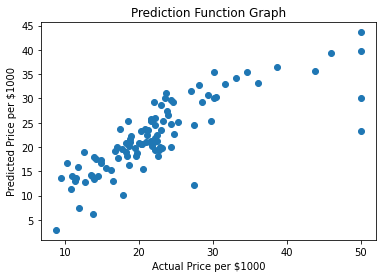

Minimum Loss function:  10.83061230192977


In [19]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# def costFunc(X,y,N,w):
#   cost = np.sum((X.dot(w)-y)**2)/2/N
#   return cost
  
# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
  # print(X.shape,y.shape)
  # w = 0
  w = np.zeros((14,1))
  loss = [0] * numItrs 
  N = len(X)

  # iter x amount of times to get loss function.
  for j in range(numItrs): 
  # w = w + (np.dot(np.dot((1/N),X.T),(y-X.dot(w)))) * learning_rate   
    y_hat = myPredictFun(X,w)
    error = y_hat - y
    w = w - learning_rate * (X.T.dot(X.dot(w)-y)/N)
    cost = np.sum((y_hat-y)**2)/2/N
    loss[j] = cost
    # print('w for {} iter is {}'.format(j,w))
    #subtract for loss function and minimize 
    # w = w - (learning_rate * (1/N) * np.dot(X.T,error))
    # wl.append(w)
      
  # wl = np.array(wl)
  # l = np.array(loss)
  return w,loss

 

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  # print('in predict',X.shape,w.shape)
  return np.dot(X,w)


# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0.03,300)
w = np.array(w)
loss = np.array(loss)
# print(w.shape,loss.shape)
# Task 3-3: show intercept and coefficents
print("Intercept: ", w[0][0])
print("Coeffs: ", w[1:])

# Task 3-4: show errors on training dataset and testing dataset
train_data_predictFun = myPredictFun(train_data_intercept, w)
training_rmse = (np.sqrt(mean_squared_error(train_target, train_data_predictFun)))
test_data_predictFun = myPredictFun(test_data_intercept, w)
testing_rmse = (np.sqrt(mean_squared_error(test_target, test_data_predictFun)))

print("\nThe training and target data error")
print("--------------------------------------")
print('training RMSE is {}'.format(training_rmse))
print('Testing RMSE is {}'.format(testing_rmse))

# Task 3-5: plot learning curves showing training errors and testing errors along iterations
plt.title("Cost Function Graph")
plt.xlabel("no. Of iterations")
plt.ylabel("Cost Function ")
plt.plot(loss)
plt.show()

plt.title("Prediction Function Graph")
plt.scatter(test_target, test_target_predict)
# plt.plot(test_target_predict, linestyle='dashed')
plt.xlabel("Actual Price per $1000")
plt.ylabel("Predicted Price per $1000")
plt.show()
print('Minimum Loss function: ',loss[-1])

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

In [6]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
    return 

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0.03,300,0)

# Task 4-3: show intercept and coefficents


# Task 4-4: show errors on training dataset and testing dataset


# Task 4-5: plot learning curves showing training errors and testing errors along bath

TypeError: ignored